# DETECTING DIABETES-Meghana H P

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

#for modelling:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## 2. Reading data


In [4]:
df=pd.read_csv(r"C:\Users\Bhanu\Desktop\MeriSKILL\Meriskill project 2\diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Exploratory Data Analysis

<Axes: >

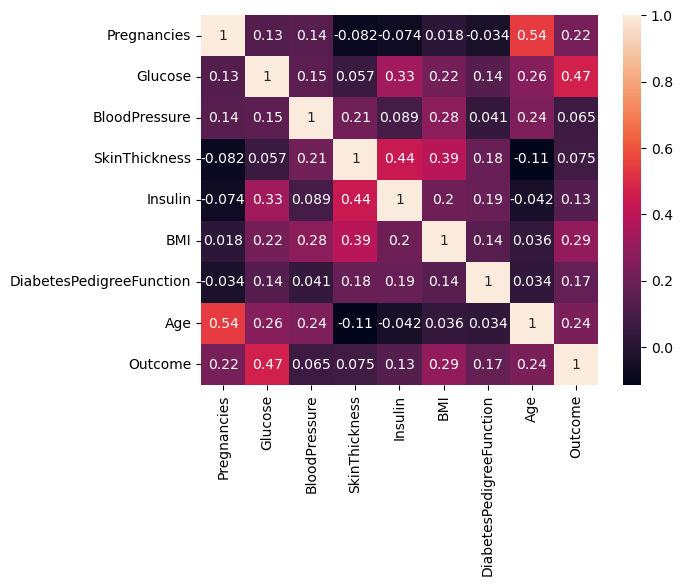

In [9]:
sns.heatmap(df.corr(),annot=True)

### Almost all the columns are positively correlated to each other

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

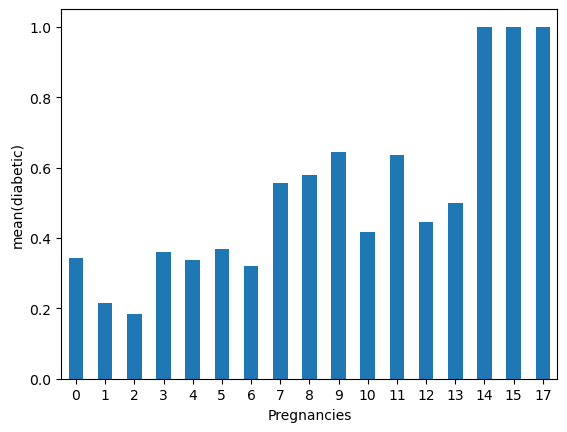

In [12]:
df.groupby('Pregnancies').Outcome.mean().plot(kind='bar')
plt.ylabel('mean(diabetic)')
plt.xticks(rotation=0)
plt.show()

### This shows that as the number of pregnancies increases, the chances of being a diabetic is more

<Axes: xlabel='Age', ylabel='Glucose'>

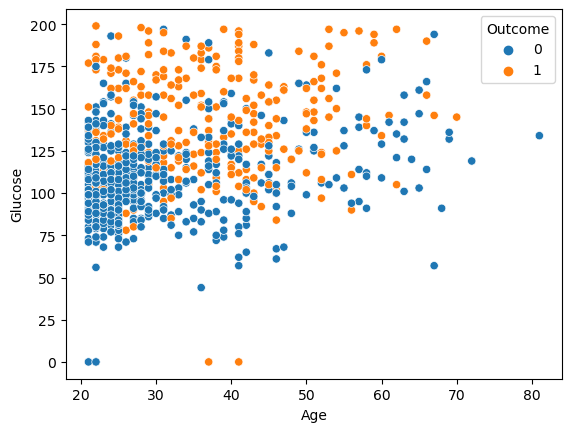

In [13]:
sns.scatterplot(x=df.Age,y=df.Glucose,hue=df.Outcome)

### It is seen that at younger ages between 20-30 years, if the glucose level is in between 75-150, it is okay, the patient is safe from diabetes. But if the same glucose is maintained at older ages, there might be chances of diabetes.
### Hence, as the age increases, the glucose should be reduced in order to avoid diabetes

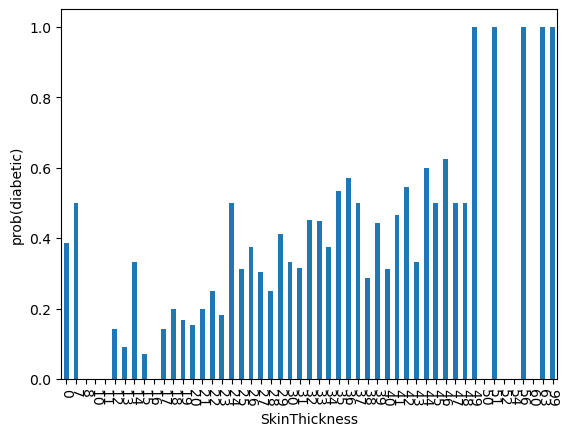

In [11]:
df.groupby('SkinThickness').Outcome.mean().plot(kind='bar')
plt.ylabel('prob(diabetic)')
plt.xticks(rotation=270)
plt.show()

### As the skin thickness increases, the probabilty of being a diabeteic patient increases


In [13]:
df.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

([<matplotlib.axis.XTick at 0x1dae2c74110>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

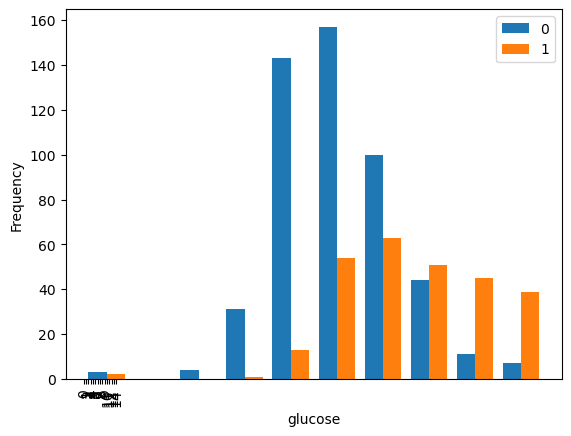

In [14]:
Glucose_diabetes_0 = [df.Glucose[i] for i in range(len(df.Glucose)) if df.Outcome[i] == 0]
Glucose_diabetes_1 = [df.Glucose[i] for i in range(len(df.Glucose)) if df.Outcome[i] == 1]

plt.hist([Glucose_diabetes_0,Glucose_diabetes_1],bins=None,label=[0,1],)
plt.xlabel('glucose')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(range(15),rotation=90)


In [15]:
df.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

<Axes: xlabel='Age', ylabel='SkinThickness'>

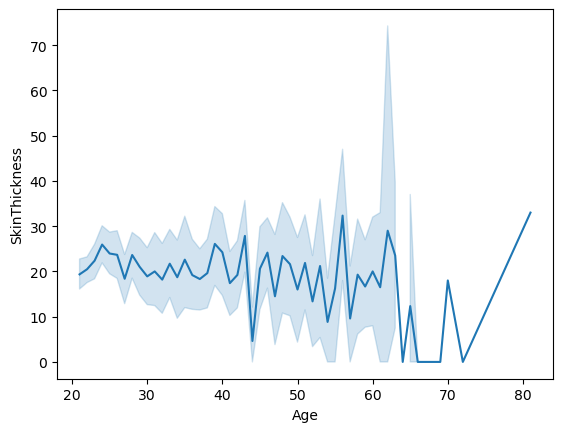

In [15]:
sns.lineplot(data=df,x='Age',y='SkinThickness')

### As the age increases, the skin thickness decreases

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='BloodPressure'>

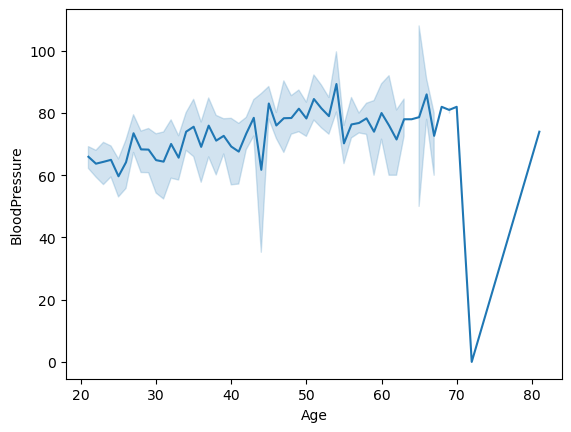

In [17]:
sns.lineplot(data=df,x='Age',y='BloodPressure')

### The BP is usually increasing with the age, but there is a sudden dip in blood pressure after 70 years of age

<Axes: xlabel='Age', ylabel='Insulin'>

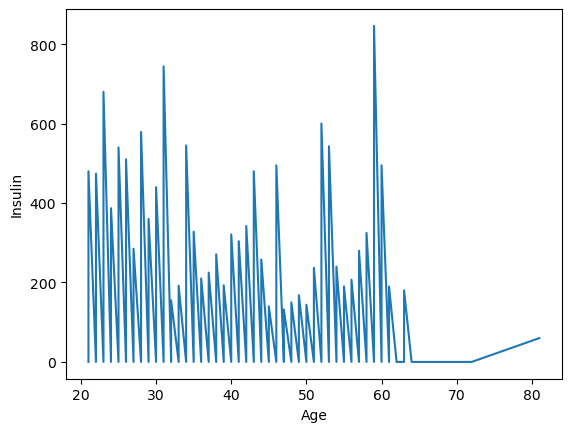

In [18]:
sns.lineplot(data=df,x='Age',y='Insulin',estimator=None)

### There is no such pattern derived from insulin variation with age

<Axes: xlabel='Age', ylabel='BMI'>

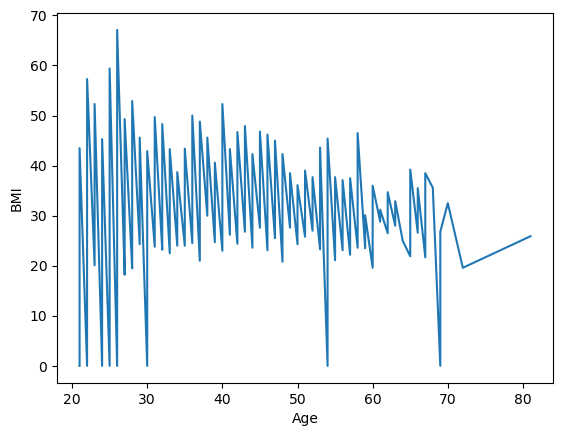

In [19]:
sns.lineplot(data=df,x='Age',y='BMI',estimator=None)

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

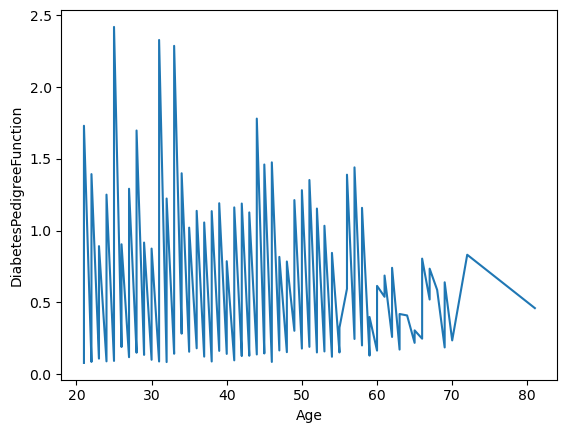

In [20]:
sns.lineplot(data=df,x='Age',y='DiabetesPedigreeFunction',estimator=None)

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

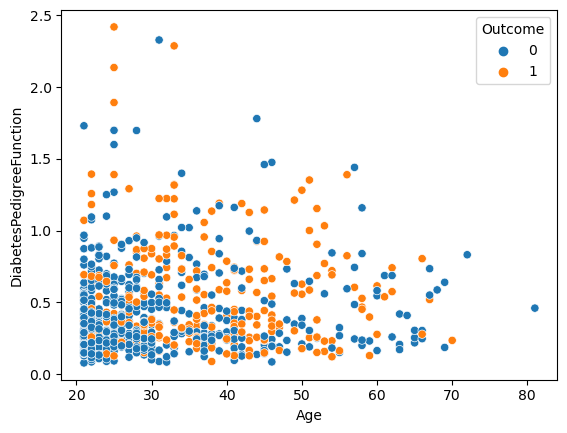

In [22]:
sns.scatterplot(data=df,x='Age',y='DiabetesPedigreeFunction',hue='Outcome')

### In younger ages, if the diabetes pedigree function is low, there are low chances of diabetes. But as the age advances, having a lower diabetes pedigree function also doesn't help in getting exposed to diabetes.
### This means that this function's value changes according to age

In [23]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 4. Train-Test split

In [24]:
X=df.drop('Outcome',axis=1)

In [25]:
y=df['Outcome']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## 5. Model Building

In [27]:
algos = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
names = ['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier']
rmse_list = []
r2_s = []
r2_t=[]

In [28]:
for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_pred = model.predict(X_test)
    print('Training set confusion matrix')
    print(confusion_matrix(y_train,y_train_pred))
    print('Testing set confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print(name,'train classification report')
    print(classification_report(y_train,y_train_pred))
    print(name,'test classification report')
    print(classification_report(y_test,y_pred))
    

Training set confusion matrix
[[345  48]
 [ 92 129]]
Testing set confusion matrix
[[98  9]
 [18 29]]
LogisticRegression() train classification report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       393
           1       0.73      0.58      0.65       221

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614

LogisticRegression() test classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Training set confusion matrix
[[393   0]
 [  0 221]]
Testing set confusion matrix
[[87 20]
 [19 28]]
DecisionTreeClassifier() train classification r

### From the above results, it is seen that Logistic Regression gives the best test accuracy of  82% 

### Anyhow, we shall check with Random forest regressor as well

In [29]:
param_dist = {
    'n_estimators': [100, 200, 300,400,500,600],
    'max_depth': [10, 20, 30,40,50,60],
    'min_samples_split': [2, 5, 10,20,30],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'max_features': ['sqrt', 'log2']}

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist,  cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 30}


In [30]:
model2 = RandomForestClassifier(n_estimators = 500,min_samples_split =10, min_samples_leaf=6, max_features ='sqrt',max_depth =20)

In [31]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [32]:
confusion_matrix(y_test,y_test_pred)
print(name,'classification report train')
print(classification_report(y_train,y_train_pred))

print(name,'classification report test')
print(classification_report(y_test,y_test_pred))

RandomForestClassifier() classification report train
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       393
           1       0.88      0.80      0.84       221

    accuracy                           0.89       614
   macro avg       0.89      0.87      0.88       614
weighted avg       0.89      0.89      0.89       614

RandomForestClassifier() classification report test
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



### It is seen that random forest regressor test result is the same as that of logistic regressor. So either of the models can be chosen for prediction.
### Here, we will be continuing with random forest regressor

## 6. Predictions

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
check=[[2,95,34,56,43,65.3,0.51,20]]

In [35]:
prediction=model2.predict(check)
print(prediction)

[0]


## 7. Conclusion

### Thus the best model is the Random Forest regressor, giving us a testing accuracy of 82% 